In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("A2_P2.csv")

In [ ]:
X = df[['Feature 1', 'Feature 2']].values
y = df['Output'].values.reshape(-1, 1)

In [ ]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def compute_mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

In [ ]:
def compute_log_likelihood(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))



In [ ]:
def gradient_descent(X, y, lr, num_iters, loss_type="mse"):
    n_samples, n_features = X.shape
    weights = np.zeros((n_features, 1))
    losses = []

    for _ in range(num_iters):
        z = X @ weights
        y_pred = sigmoid(z)

        if loss_type == "mse":
            loss = compute_mse_loss(y_pred, y)
            gradient = (2 / n_samples) * X.T @ ((y_pred - y) * y_pred * (1 - y_pred))
        elif loss_type == "log_likelihood":
            loss = -compute_log_likelihood(y_pred, y)
            gradient = (1 / n_samples) * X.T @ (y_pred - y)
        else:
            raise ValueError("Invalid loss_type")

        weights -= lr * gradient
        losses.append(loss)

    return weights, losses

In [ ]:
learning_rates = [0.01, 0.05]
loss_types = ["mse", "log_likelihood"]
results = {}

In [ ]:
for lr in learning_rates:
    for loss in loss_types:
        weights, losses = gradient_descent(X, y, lr, 20, loss_type=loss)
        results[(lr, loss)] = (weights, losses)

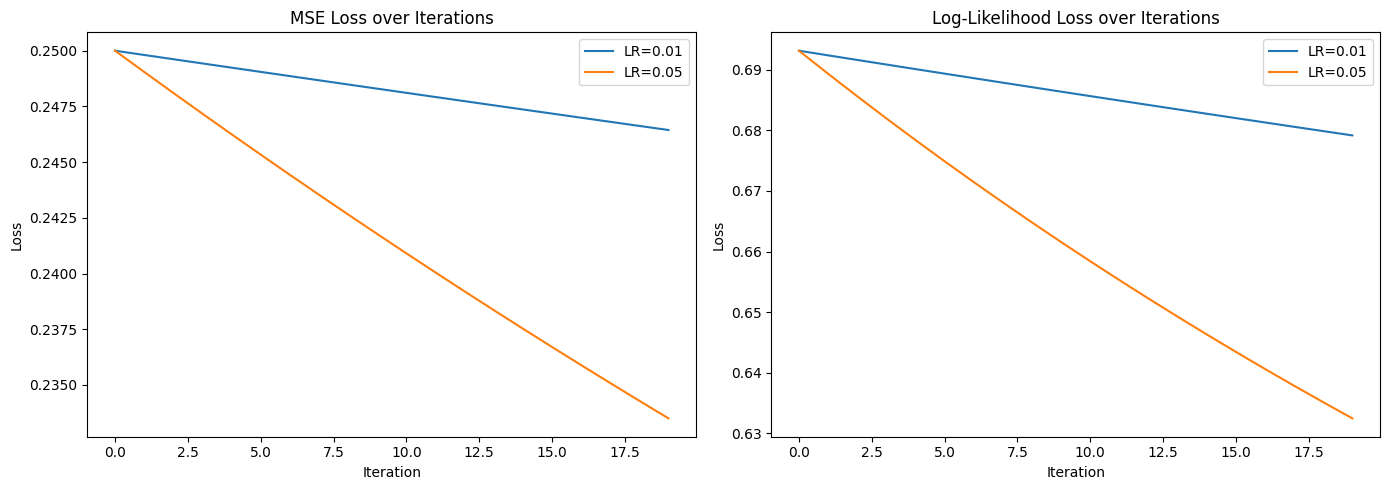

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
for i, loss_type in enumerate(loss_types):
    for lr in learning_rates:
        axs[i].plot(results[(lr, loss_type)][1], label=f"LR={lr}")
    axs[i].set_title(f"{'MSE' if loss_type == 'mse' else 'Log-Likelihood'} Loss over Iterations")
    axs[i].set_xlabel("Iteration")
    axs[i].set_ylabel("Loss")
    axs[i].legend()
plt.tight_layout()
plt.show()

In [ ]:
for key, (w, _) in results.items():
    print(f"Learning Rate = {key[0]}, Loss = {key[1]} => Final Weights: {w.flatten()}")

Learning Rate = 0.01, Loss = mse => Final Weights: [-0.02371542  0.01058657 -0.008622  ]
Learning Rate = 0.01, Loss = log_likelihood => Final Weights: [-0.04687704  0.02108314 -0.01723465]
Learning Rate = 0.05, Loss = mse => Final Weights: [-0.11295308  0.05196774 -0.04295843]
Learning Rate = 0.05, Loss = log_likelihood => Final Weights: [-0.21358772  0.10199359 -0.08562629]
